## Negativebionomial

### Hypothesis Testing : GLM

In [1]:
# 라이브러리 불러오기
import pandas as pd # 데이터 분석 및 조작을 위한 라이브러리
import numpy as np # 수학적 계산을 위한 라이브러리
import pickle # 객체 직렬화 및 역직렬화를 위한 라이브러리

from patsy import dmatrices # 통계 모델을 위한 모델 수식 생성을 지원하는 라이브러리
import statsmodels.api as sm # 통계 및 회귀 분석을 위한 라이브러리
from statsmodels.formula.api import glm
import matplotlib.pyplot as plt # 데이터 시각화를 위한 라이브러리
import seaborn as sns # Matplotlib을 기반으로 한 시각화 라이브러리

from sklearn.metrics import mean_squared_error # 머신 러닝 및 데이터 분석을 위한 라이브러리
from sklearn.metrics import r2_score   # R-squares (결정계수)
from math import sqrt # 수학적 계산을 위한 라이브러리

In [2]:
# 파일 불러오기
file_path = 'C:\\Users\\cho03\\Downloads\\세미나\\방학 세미나\\' # data가 저장된 파일 경로

In [3]:
# 불러오기
f = open(file_path + "total_docs1.pkl", "rb")
data1 = pickle.load(f)
f.close()

In [4]:
# 불러오기
f = open(file_path + "total_docs2.pkl", "rb")
data2 = pickle.load(f)
f.close()

In [5]:
# 필요한 컬럼 선택하여 새로운 데이터프레임 'data' 생성
data = pd.DataFrame(dtype='int64')
data['title'] = data1['title']
data['doc'] = data1['doc']
data['ch1'] = data1['ch']
data['ch2'] = data1['ch2']
data['like'] = data1['like']
data['img_cnt'] = data1['img']
data['div_cnt'] = data1['div']
data['score1'] = data1['score']

In [6]:
# 'img_cnt'와 'div_cnt' 값에 따라 'only_text_doc' 컬럼 생성 (1: 텍스트만 존재, 0: 이미지 또는 div 태그 포함)
text = []
text = []
for i in range(0,len(data)):
    if data['img_cnt'].iloc[i] == 0 and data['div_cnt'].iloc[i] == 0:
        text.append(1)
    else:
        text.append(0)

data['only_text_doc'] = text

In [7]:
# 'total_docs2.pkl' 파일에서 감성 분석 결과('values') 중 가장 높은 값을 기준으로 'score2' 컬럼 생성
def max_index(lst):
    return lst.index(max(lst))

data['score2'] = data2['values'].apply(max_index)

In [8]:
# 결측값을 0으로 대체
data['like'] = data['like'].fillna(0)
data['img_cnt'] = data['img_cnt'].fillna(0)
data['div_cnt'] = data['div_cnt'].fillna(0)

data

,title,doc,ch1,ch2,like,img_cnt,div_cnt,score1,only_text_doc,score2
0,급여노인장기요양인정신청 아들보다 딸이 부양하는 시대,저출산과 맞물려 우리가 생각해봐야 할 것이다저출산은 국가 성장의 미래 문제만으로 ...,naver,blog,5,2,0,-0.234043,0,6
1,한국 2070년 노인부양 부담 세계1위,통계청 세계 한국 인구전망급속한 저출산 고령화 직격탄한국 인구 27프로 감소 3...,naver,blog,50,2,0,-0.153846,0,1
2,여성노인 부양,부양제2판 노인복지론 2002 p284부양의 양과 종류는 가족이 가진 경제적 자...,naver,blog,4,4,0,-0.533333,0,5
3,65세 이상 노인 부양가정이라면,65세 이상 노인 부양가정이라면안녕하세요저희는 어르신들의 남은 여생을 더욱 풍요롭고...,naver,blog,3,12,1,0.533333,0,5
4,가족관계 변화와 노인 부양,가족관계 변화와 노인 부양노인 거주 형태의 변화 혼자 살거나 노부부만 사는 세대가...,naver,blog,2,1,0,0.160000,0,6
...,...,...,...,...,...,...,...,...,...,...
2162,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다,노인은 무엇으로 사는가 감사의 마음으로 사는 것이다이런 질문부터 시작 해 보자 당...,daum,cafe,3,4,0,0.966102,0,6
2163,한 장으로 보는 우리나라가 망한 이유jpg,출처대한민국 통계청인류 역사상 유래 없는 현상곧우리나라인구의40가65세이상노인으로구...,daum,cafe,3,2,0,0.000000,0,2
2164,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄,65세 이상 노인 혜택 50가지 몰라서 못 쓰는 사람이 더 많아1탄by M가이드현재...,daum,cafe,0,6,0,0.050000,0,5
2165,청주주간보호 청주요양원 추천 kbs방영된 프로그램전문기관 재활운동 요양등급상담 99...,KBS방영된 프로그램전문기관 9988 청주노인주간보호센터입니다 33명 정원의 아늑한...,daum,cafe,0,26,2,1.052632,0,9


### Splitting to test and train sets

In [9]:
# 데이터셋을 학습용(train)과 테스트용(test)으로 분리 (70%는 학습용, 30%는 테스트용)
mask = np.random.rand(len(data)) < 0.7   # 70%를 train dataset 으로 사용
data_train=data[mask]
data_test=data[~mask]

In [10]:
# 학습용 데이터셋 행, 열 개수
data_train.shape

(1504, 10)

In [11]:
# 테스트용 데이터셋 행, 열 개수
data_test.shape

(663, 10)

In [12]:
# 데이터 타입을 int64로 변환
data_train['like'] = data_train['like'].astype('int64')
data_train['img_cnt'] = data_train['img_cnt'].astype('int64')
data_train['div_cnt'] = data_train['div_cnt'].astype('int64')

data_test['like'] = data_test['like'].astype('int64')
data_test['img_cnt'] = data_test['img_cnt'].astype('int64')
data_test['div_cnt'] = data_test['div_cnt'].astype('int64')

C:\Users\cho03\AppData\Local\Temp\ipykernel_11524\3311031113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['like'] = data_train['like'].astype('int64')
C:\Users\cho03\AppData\Local\Temp\ipykernel_11524\3311031113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['img_cnt'] = data_train['img_cnt'].astype('int64')
C:\Users\cho03\AppData\Local\Temp\ipykernel_11524\3311031113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [13]:
# Negative Binomial 회귀 모델 생성을 위한 식(expr) 정의
expr ="""like ~ only_text_doc + img_cnt + div_cnt + score1"""

In [14]:
# 학습용 데이터셋과 테스트용 데이터셋에 대해 모델 생성
y_train, X_train = dmatrices(expr, data_train, return_type='dataframe') # 학습용 데이터셋을 행렬 형태로 변환
y_test, X_test = dmatrices(expr, data_test, return_type='dataframe') # 테스트용 데이터셋을 행렬 형태로 변환

### Negativebinomial model (음이항 모델) 

In [15]:
# Negative Binomial 회귀 모델 학습
nb_training_results = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha = 1)).fit()

In [16]:
# 학습된 모델 결과 요약 출력
print(nb_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   like   No. Observations:                 1504
Model:                            GLM   Df Residuals:                     1499
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4190.9
Date:                Wed, 26 Jul 2023   Deviance:                       4092.5
Time:                        16:47:21   Pearson chi2:                 1.13e+04
No. Iterations:                    15   Pseudo R-squ. (CS):             0.4872
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.6456      0.048     55.676

In [17]:
# 학습용 데이터셋을 사용하여 모델로 예측하고 예측 결과를 데이터프레임으로 변환
nb_prediction_train = nb_training_results.get_prediction(X_train) # 학습용 데이터로 예측
nb_summary_frame_train = nb_prediction_train.summary_frame() # 예측 결과를 데이터프레임 형태로 변환
print(nb_summary_frame_train)

           mean   mean_se  mean_ci_lower  mean_ci_upper
1     14.354095  0.615131      13.197703      15.611810
2     15.038360  0.679970      13.762991      16.431913
6     14.708535  0.627224      13.529170      15.990708
7     14.322340  0.575460      13.237727      15.495820
10    12.884016  0.657465      11.657752      14.239268
...         ...       ...            ...            ...
2159  12.476625  0.750085      11.089796      14.036883
2160  12.476625  0.750085      11.089796      14.036883
2161   7.764345  1.656450       5.111037      11.795073
2164  13.974841  0.549999      12.937390      15.095486
2165   7.791345  1.529733       5.302609      11.448148

[1504 rows x 4 columns]


In [18]:
# 예측 결과에서 평균 값을 추출
predicted_counts_train = nb_summary_frame_train['mean']
predicted_counts_train 

1       14.354095
2       15.038360
6       14.708535
7       14.322340
10      12.884016
          ...    
2159    12.476625
2160    12.476625
2161     7.764345
2164    13.974841
2165     7.791345
Name: mean, Length: 1504, dtype: float64

In [19]:
r2_score(y_train, predicted_counts_train) # 결정계수 계산

0.03723827431405469

In [20]:
# 테스트용 데이터셋을 사용하여 모델로 예측하고 예측 결과를 데이터프레임으로 변환
nb_prediction_test = nb_training_results.get_prediction(X_test) # 테스트용 데이터로 예측
nb_summary_frame_test= nb_prediction_test.summary_frame()
print(nb_summary_frame_test)

           mean   mean_se  mean_ci_lower  mean_ci_upper
0     14.498183  0.627366      13.319267      15.781447
3     10.472620  1.016349       8.658601      12.666684
4     13.808639  0.637695      12.613676      15.116807
5      2.321410  0.129363       2.081220       2.589321
8     13.539260  0.654535      12.315297      14.884866
...         ...       ...            ...            ...
2133  14.081677  0.603647      12.946890      15.315928
2142  12.476625  0.750085      11.089796      14.036883
2162  12.476625  0.750085      11.089796      14.036883
2163  14.081677  0.603647      12.946890      15.315928
2166   1.960401  0.099478       1.774810       2.165400

[663 rows x 4 columns]


In [21]:
# 예측 결과에서 평균 값을 추출
predicted_counts_test = nb_summary_frame_test['mean']
predicted_counts_test

0       14.498183
3       10.472620
4       13.808639
5        2.321410
8       13.539260
          ...    
2133    14.081677
2142    12.476625
2162    12.476625
2163    14.081677
2166     1.960401
Name: mean, Length: 663, dtype: float64

In [22]:
# 예측 결과 시각화
x_index_array = np.array(X_test.index)
predicted_counts_array = np.array(predicted_counts_test)

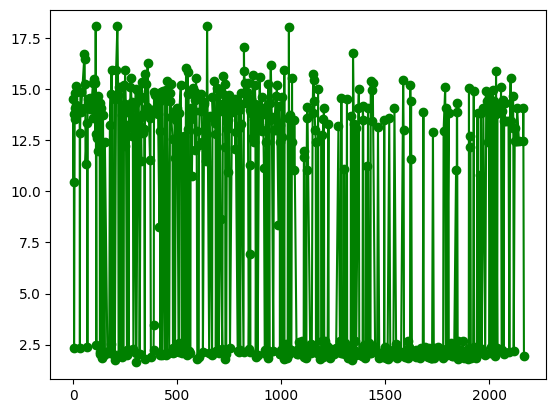

In [23]:
plt.plot(x_index_array, predicted_counts_array, 'go-', label='Predicted counts')

In [24]:
r2_score(y_test, predicted_counts_test) # r2_score 함수를 사용하여 회귀 모델의 R-squared (결정계수) 값을 계산

-0.02436151084004634

<function matplotlib.pyplot.show(close=None, block=None)>

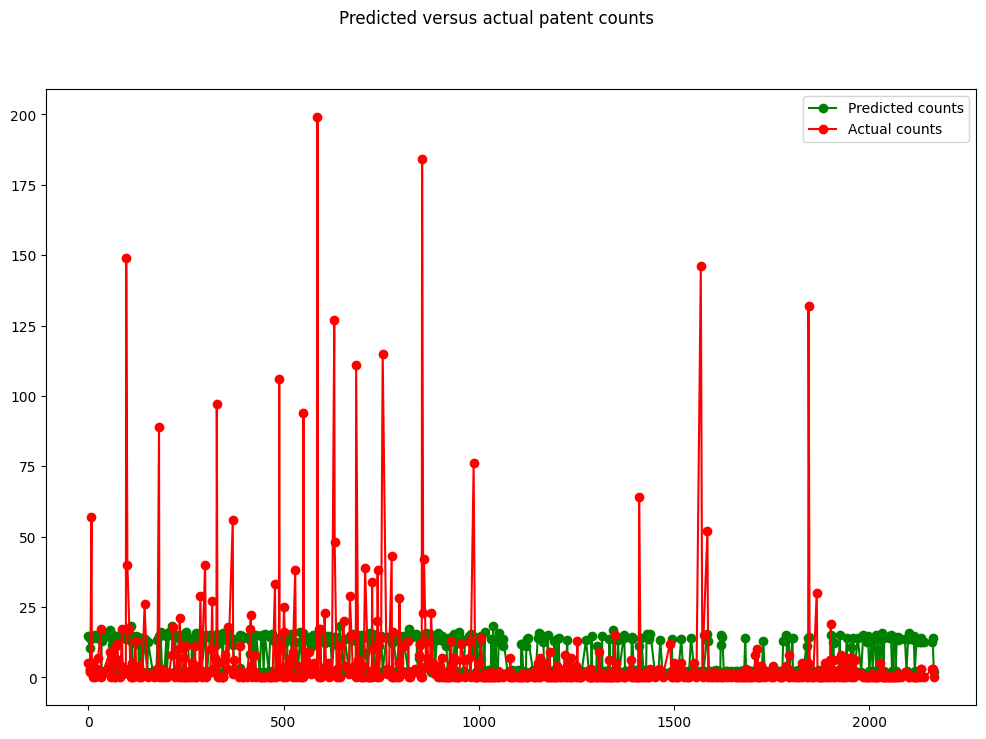

In [25]:
fig=plt.figure(figsize=(12,8)) # 크기를 설정
fig.suptitle('Predicted versus actual patent counts') # 제목 설정

x_index_array = np.array(X_test.index) # X_test 데이터프레임의 인덱스를 NumPy 배열로 변환
predicted_counts_array = np.array(predicted_counts_test) # 모델에서 예측한 특허 수(counts)를 NumPy 배열로 변환

# 모델이 예측한 특허 수를 나타내는 선 그래프를 생성하고 녹색으로 표시
predicted, = plt.plot(x_index_array, predicted_counts_array, 'go-', label='Predicted counts')

y_test_array = np.array(y_test) # y_test 데이터프레임의 값을 NumPy 배열로 변환

# 실제 특허 수를 나타내는 선 그래프를 생성하고 빨간색으로 표시
actual, = plt.plot(x_index_array, y_test_array,  'ro-', label='Actual counts')

# 범례(legend)를 추가하여 예측 값과 실제 값의 구분을 표시
plt.legend(handles=[predicted, actual])
plt.show # 화면에 표시